### 1- About the project

### 2- Data set

### 3- Install and import libraries and modules

In [ ]:
#pip install numpy
#pip install pandas
#pip install re
#pip instal tqdm
#pip install wordcloud
#pip install matplotlib
#pip install nltk
#pip install sklearn
#pip install sys
#pip install nltk
#pip install sentence_transformers

In [33]:
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
import my_functions as f
import time
import requests
# from nltk import tokenize, word_tokenizes
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import urllib.request
from urlextract import URLExtract
from selenium import webdriver
from selenium.webdriver import *
from selenium.webdriver.common.by import By
import spacy    
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

import joblib
import seaborn as sns
from collections import Counter




ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/amr/anaconda3/lib/python3.9/site-packages/sklearn/metrics/__init__.py)

### 4- Importing the data

In [3]:
# read csv data
data= pd.read_csv("../dataset/1-train/Constraint_Train.csv")


### 5- Understanding the data

In [4]:
# data=data.drop(columns=["Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","id",])
data=data.drop(columns=["Unnamed: 3","id",])

In [4]:
data.head(10)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
5,"Covid Act Now found ""on average each person in...",real
6,If you tested positive for #COVID19 and have n...,real
7,Obama Calls Trump’s Coronavirus Response A Cha...,fake
8,???Clearly the Obama administration did not le...,fake
9,Retraction—Hydroxychloroquine or chloroquine w...,fake


In [5]:
for i in range(len(data)):
    print(i)
    print(data.tweet[i])
    print(data.label[i])
    print("---------------------------------")

0
The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
real
---------------------------------
1
States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux
real
---------------------------------
2
Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville
fake
---------------------------------
3
#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ
real
---------------------------------
4
Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: 

In [7]:
print("Length: ",len(data))
print("Shape: ",data.shape)

Length:  6415
Shape:  (6415, 2)


In [8]:
print(data[['label']].describe())


       label
count   6415
unique     2
top     real
freq    3360


In [9]:
#Average tweet length
lis = []
count = 0
min=1000
max=0
for i in data['tweet']:
    tweet_count=len(''.join(str(i).split()))
    count += tweet_count
    # print(i)
    if min >tweet_count:
        min=tweet_count
        q=i
    if max<tweet_count:
        max=tweet_count
        x=i
    if tweet_count > 1000:
        lis.append([i , tweet_count])
        

avg_tweet_length = count / len(data['tweet'])

print("Average Tweet length is:", avg_tweet_length)
print("minimum Tweet length is:", min)
print("maximum Tweet length is:", max)

# print(q)
# print("----------------------")
# print(x)

print(len(lis))


Average Tweet length is: 155.2888542478566
minimum Tweet length is: 16
maximum Tweet length is: 7368
3


100%|██████████| 6415/6415 [00:04<00:00, 1558.92it/s]


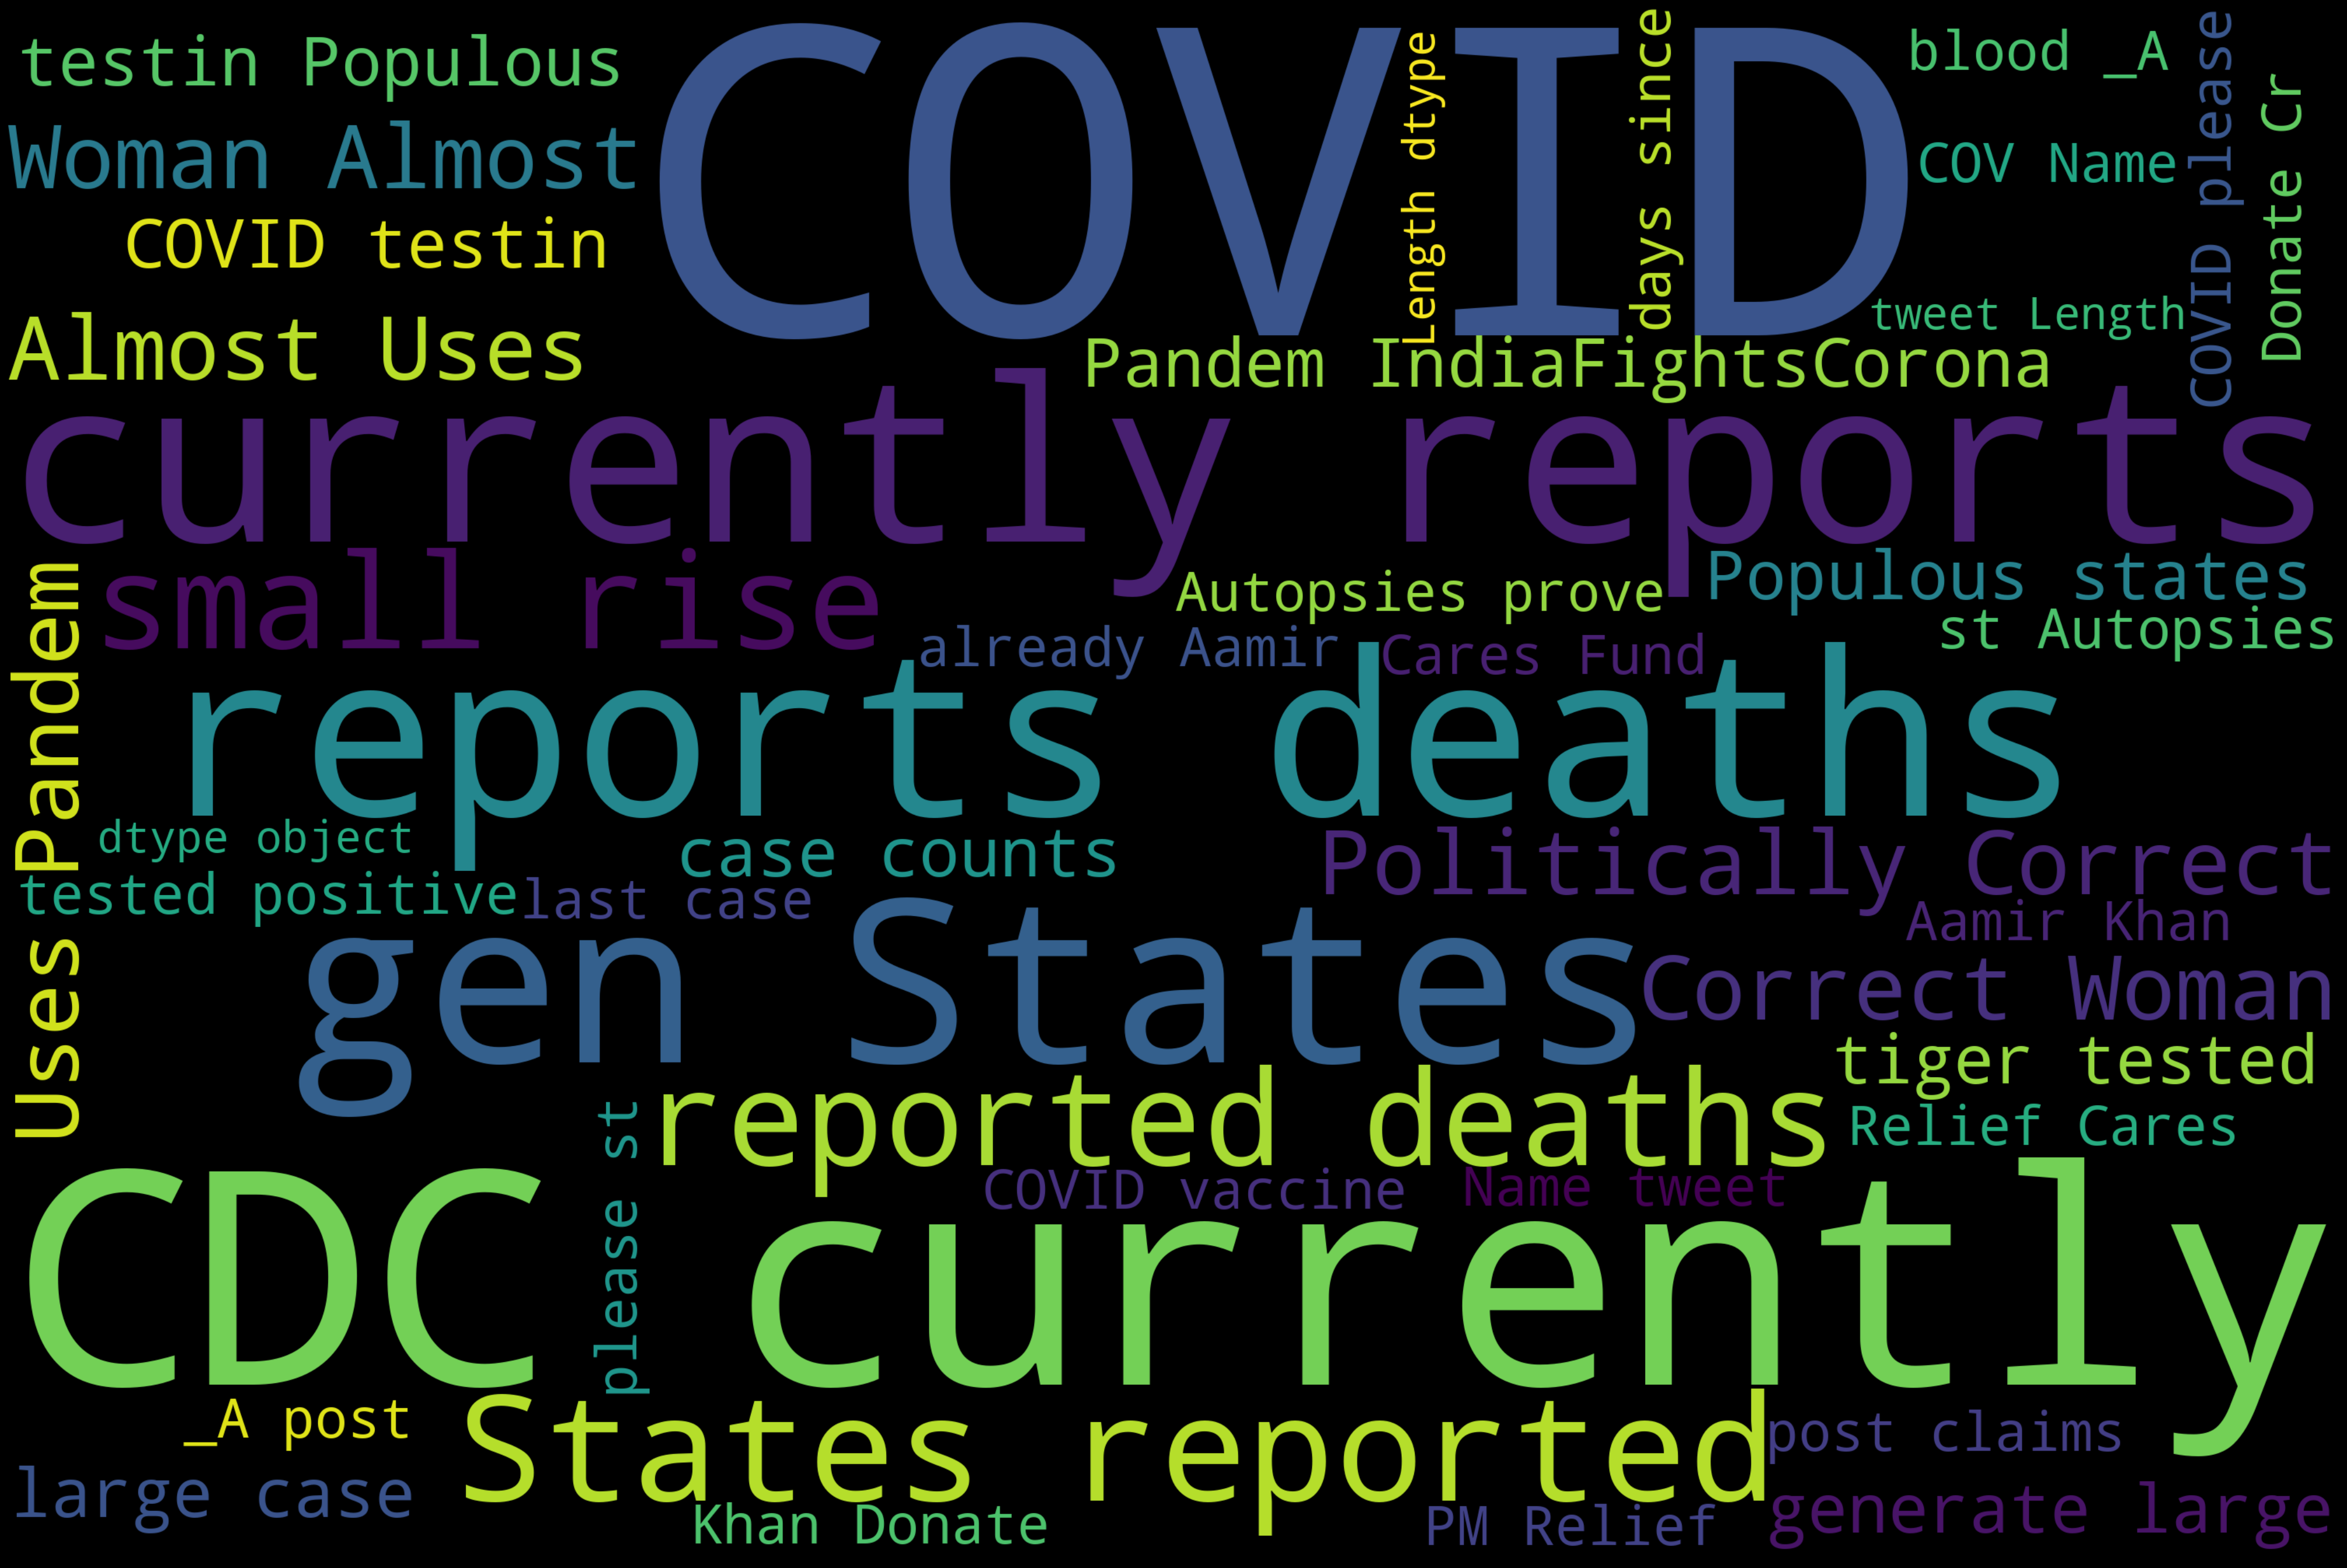

In [11]:
#Word Cloud Data
text = ''
for news in tqdm(range(len(data))):
    
    text += f" {data.tweet}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

[nltk_data] Downloading package stopwords to /home/amr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


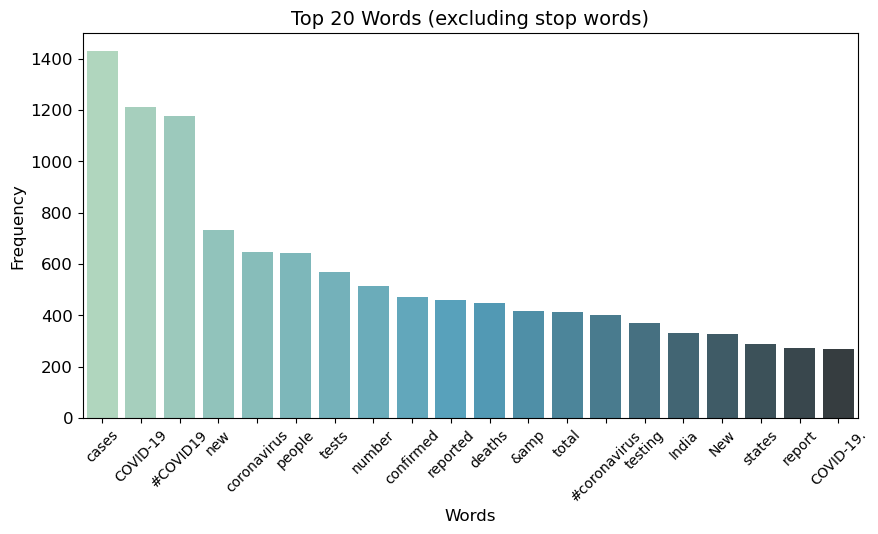

In [12]:
#Top 20 Words

nltk.download('stopwords')

# Define a set of stop words
stop_words = set(stopwords.words('english'))

words = []

# Loop through each row in the 'tweet' column and split the text into words
for index, row in data.iterrows():
    tweet_words = row['tweet'].split()
    # Remove stop words from the list of words
    tweet_words = [word for word in tweet_words if word.lower() not in stop_words]
    words.extend(tweet_words)

# Count the frequency of each word
word_counts = Counter(words)

# Create a DataFrame of the top 20 most frequently occurring words
top_20 = pd.DataFrame(
    word_counts.most_common(20),
    columns=['word', 'frequency']
)

# Plot a bar chart of the top 20 most frequently occurring words
fig = plt.figure(figsize=(10,5))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=10
)

plt.yticks(fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 20 Words (excluding stop words)', fontsize=14)

plt.show()

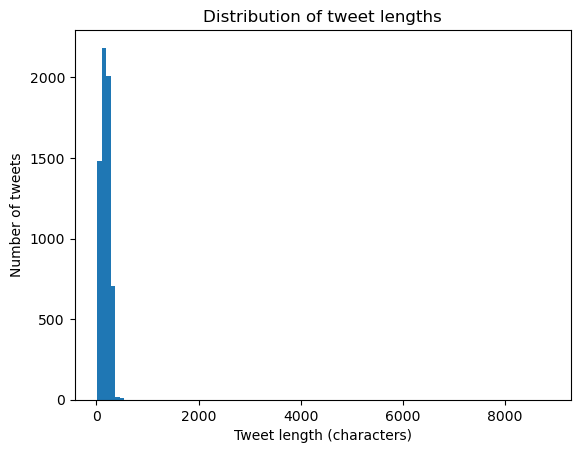

In [13]:
#histogram
tweet_lengths = [len(tweet) for tweet in data['tweet']]
plt.hist(tweet_lengths, bins=100)
plt.title('Distribution of tweet lengths')
plt.xlabel('Tweet length (characters)')
plt.ylabel('Number of tweets')
plt.show()

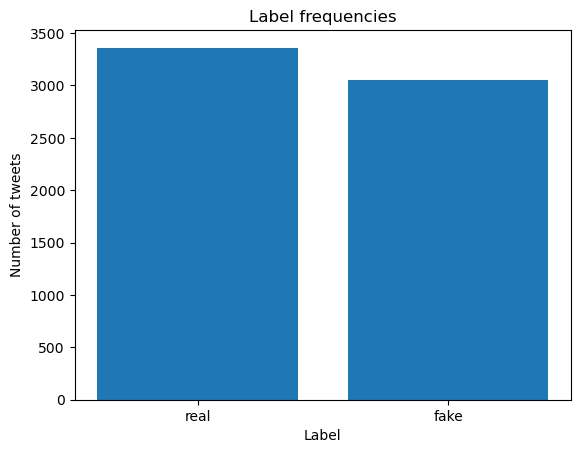

In [14]:
#bar plot 
label_counts = data['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.title('Label frequencies')
plt.xlabel('Label')
plt.ylabel('Number of tweets')
plt.show()

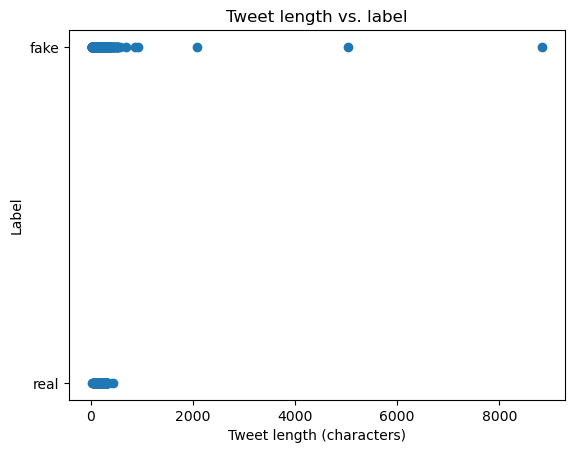

In [15]:
#scatter plot 
plt.scatter(tweet_lengths, data['label'])
plt.title('Tweet length vs. label')
plt.xlabel('Tweet length (characters)')
plt.ylabel('Label')
plt.show()

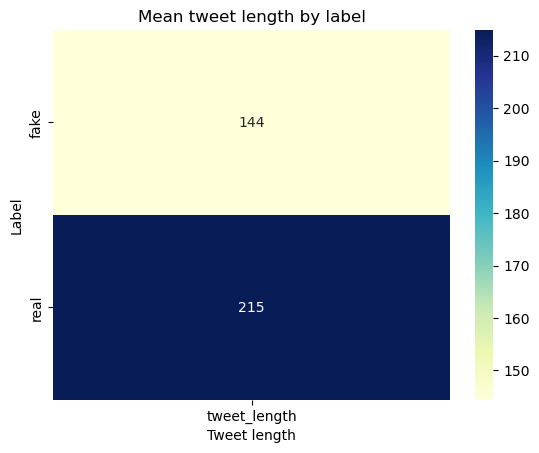

In [16]:
#heatmap_data

# Create a new DataFrame with tweet length and label
data_heatmap = pd.DataFrame({'tweet_length': tweet_lengths, 'label': data['label']})

# Create a pivot table to calculate the mean tweet length for each label
heatmap_data = data_heatmap.pivot_table(values='tweet_length', index='label', aggfunc='mean')

# Create a heatmap using the pivot table
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Mean tweet length by label')
plt.xlabel('Tweet length')
plt.ylabel('Label')
plt.show()

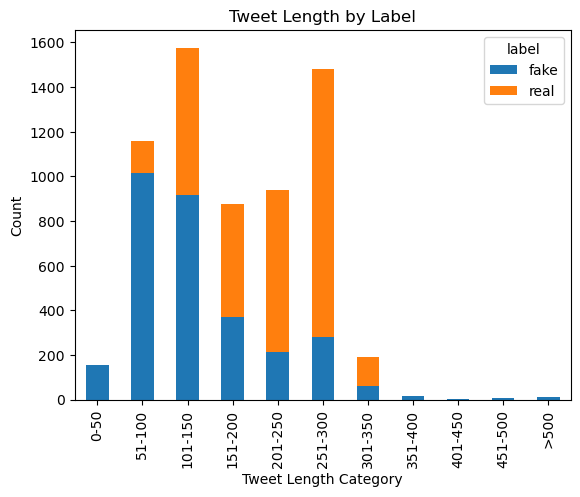

In [17]:
#stacked column chart
# Get the count of each label
label_counts = data['label'].value_counts()

# Define the length categories
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '>500']
data['len_category'] = pd.cut(data['tweet'].str.len(), bins=bins, labels=labels)

# Group the DataFrame by length category and label, and count the number of tweets in each category
grouped_df = data.groupby(['len_category', 'label']).size().unstack(fill_value=0)

# Create a stacked column chart
grouped_df.plot(kind='bar', stacked=True)
plt.title('Tweet Length by Label')
plt.xlabel('Tweet Length Category')
plt.ylabel('Count')
plt.show()

### 6- data Preprocessing

#### 6.1 cleaning data

In [5]:
cleaned=data.copy(deep=True)
for ind in range(len(cleaned)):
    tweet=f.remove_emoji(cleaned.tweet[ind])
    tweet=f.remove_symbols(tweet)
    tweet=f.remove_space(tweet)
    tweet=f.extract_mention(tweet)
    tweet=f.remove_urls(tweet)
    cleaned.tweet[ind]=tweet
    
    
cleaned.head(15)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
5,"Covid Act Now found ""on average each person in...",real
6,If you tested positive for #COVID19 and have n...,real
7,Obama Calls Trump’s Coronavirus Response A Cha...,fake
8,Clearly the Obama administration did not leav...,fake
9,Retraction—Hydroxychloroquine or chloroquine w...,fake


In [6]:
for i in range(10):
    print(data.tweet[i])
    print(data.label[i])
    print("---------------------------------")

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
real
---------------------------------
States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux
real
---------------------------------
Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville
fake
---------------------------------
#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ
real
---------------------------------
Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID K

In [7]:
for i in range(10):
    print(cleaned.tweet[i])
    print(cleaned.label[i])
    print("---------------------------------")

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
real
---------------------------------
States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. 
real
---------------------------------
Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag  #coronavirus #nashville
fake
---------------------------------
#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done :  DG  #StaySafe #IndiaWillWin 
real
---------------------------------
Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. 
real
---------------------------------
Covid Act Now found "on averag

#### 6.2 extract url

In [10]:
# extract urls  to extrnal  2 lists
url1_list=[]
url2_list=[]

for line in tqdm(data['tweet']):
    url_list=f.find_url(line)
    if len(url_list) == 2:
        url1_list.append(url_list[0][0])
        url2_list.append(url_list[1][0])
    elif len(url_list) == 1:
        url1_list.append(url_list[0][0])
        url2_list.append("_")
    else:
        url1_list.append("_")
        url2_list.append("_")
    


100%|██████████| 6415/6415 [00:00<00:00, 120447.20it/s]


##### 6.2.1 work with first list

In [44]:
i=0
for url in tqdm(url1_list):
    try:
        response = requests.get(url,timeout=50)
        if response.status_code == 200:
            url1_list[i]=response.url
        else:
            url1_list[i]='_'
    except requests.exceptions.RequestException as e:
        url1_list[i]='_'
    i+=1


100%|██████████| 6415/6415 [4:07:33<00:00,  2.32s/it]   


In [49]:
i=0
url1_weights_list=[]
for text in tqdm(url1_list):
    word = "twitter.com"
    if text == "_":
        url1_weights_list.append(0)
        continue
    if word in text:
        url1_weights_list.append(0)
        continue
    else:
        a=f.sim_values_url_v1(text,cleaned['tweet'][i])

        url1_weights_list.append(a)
    i+=1


100%|██████████| 6415/6415 [45:40<00:00,  2.34it/s]  


In [45]:
dfa1 = pd.DataFrame(url1_list,columns=['url_list1'])
dfa1.to_csv('../dataset/url_list1.csv', index=False)

In [50]:
dfa11 = pd.DataFrame(url1_weights_list,columns=['url_weight_list1'])
dfa11.to_csv('../dataset/url_weight_list1.csv', index=False)

##### 6.2.2 work with Second list

In [11]:
i=0
for url in tqdm(url2_list):
    try:
        response = requests.get(url,timeout=50)
        if response.status_code == 200:
            url2_list[i]=response.url
        else:
            url2_list[i]='_'
    except requests.exceptions.RequestException as e:
        url2_list[i]='_'
    i+=1

100%|██████████| 6415/6415 [38:43<00:00,  2.76it/s]  


In [13]:
i=0
url2_weights_list=[]
for text in tqdm(url2_list):
    word = "twitter.com"
    if text == "_":
        url2_weights_list.append(0)
        continue
    if word in text:
        url2_weights_list.append(0)
        continue
    else:
        a=f.sim_values_url_v1(text,cleaned['tweet'][i])
        url2_weights_list.append(a)
    i+=1


100%|██████████| 6415/6415 [00:19<00:00, 331.17it/s]


In [12]:
dfa2 = pd.DataFrame(url2_list,columns=['url_list2'])
dfa2.to_csv('../dataset/url_list2.csv', index=False)

In [14]:
dfa21 = pd.DataFrame(url2_weights_list,columns=['url_weight_list2'])
dfa21.to_csv('../dataset/url_weight_list2.csv', index=False)

#### 6.3 build tfidf

In [8]:
# read csv data
url1_weights_list= pd.read_csv("../dataset/url_weight_list1.csv")
url2_weights_list= pd.read_csv("../dataset/url_weight_list2.csv")

In [9]:
cleaned['url1']=url1_weights_list
cleaned['url2']=url2_weights_list

In [10]:
cleaned.head(133)

,tweet,label,url1,url2
0,The CDC currently reports 99031 deaths. In gen...,real,0.000000,0.000000
1,States reported 1121 deaths a small rise from ...,real,0.000000,0.000000
2,Politically Correct Woman (Almost) Uses Pandem...,fake,0.242617,0.000000
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0.000000,0.000000
4,Populous states can generate large case counts...,real,0.000000,0.000000
...,...,...,...,...
128,Transparency from our leaders is vital during ...,real,0.000000,0.305023
129,There is no one in NZ receiving hospital level...,real,0.000000,0.000000
130,In our rapid response team is working with NF...,real,0.000000,0.000000
131,Of the new recovered cases about 60% are repor...,real,0.000000,0.000000


In [11]:
# split the dataset into training and testing sets
train_df, test_df = train_test_split(cleaned, test_size=0.2, random_state=42)

In [12]:
# create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [13]:
# fit the vectorizer on the training data
X_train = vectorizer.fit_transform(train_df['tweet'])
feature_names = vectorizer.get_feature_names_out()
y_train = train_df['label']
feature_names

array(['00', '000', '00ice', ..., 'áñez', '𝗰𝗼𝗺𝗽𝗹𝗲𝘁𝗲𝗹𝘆', '𝗶𝗻𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗲'],
      dtype=object)

In [14]:

# transform the test data using the fitted vectorizer
X_test = vectorizer.transform(test_df['tweet'])
feature_names2 = vectorizer.get_feature_names_out()
y_test = test_df['label']

In [15]:
#########    ----> tfidf added
dense = X_train.todense()
denselist = dense.tolist()
tfidf_df = pd.DataFrame(denselist, columns=feature_names)

In [16]:
tfidf_df['url1']=train_df['url1']
tfidf_df['url2']=train_df['url2']


In [17]:
tfidf_df=tfidf_df.fillna(0)

In [18]:
tfidf_df

,00,000,00ice,00pm,01,0141,02,03,033,04,...,zookeepers,zoology,zoom,zooming,zyphr,áñez,𝗰𝗼𝗺𝗽𝗹𝗲𝘁𝗲𝗹𝘆,𝗶𝗻𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗲,url1,url2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242617,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


#### 6.4 save table

In [83]:
joblib.dump(vectorizer, './vectorizer.joblib')

['./vectorizer.joblib']

### 7- Model

In [ ]:
# label=data.label.replace({"real":1.0,"fake":0.0},inplace=True)

In [19]:
# train a logistic regression model on the training data
l_model = LogisticRegression()
l_model.fit(tfidf_df, y_train)

LogisticRegression()

In [20]:
#########    ----> tfidf added
dense = X_test.todense()
denselist = dense.tolist()
tfidf_df_test = pd.DataFrame(denselist, columns=feature_names)
tfidf_df_test['url1']=test_df['url1']
tfidf_df_test['url2']=test_df['url2']
tfidf_df_test=tfidf_df_test.fillna(0)

# make predictions on the test data
y_pred = l_model.predict(tfidf_df_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='fake')
recall = recall_score(y_test, y_pred, pos_label='fake')
f1 = f1_score(y_test, y_pred, pos_label='fake')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.9127
Precision: 0.9119
Recall: 0.9119
F1-score: 0.9119


#### 7.2 save model

In [88]:
joblib.dump(l_model, 'model.joblib')

['model.joblib']

### 8- Evaluation Matrics

In [21]:
print(y_test)

5008    real
5706    fake
1090    fake
1335    real
4998    fake
        ... 
1618    fake
5095    real
2022    fake
509     fake
5455    fake
Name: label, Length: 1283, dtype: object


In [22]:
y_test_edit=y_test.replace({"real":1.0,"fake":0.0})

In [23]:
y_pred = l_model.predict(tfidf_df_test)
# using score to get accuracy of model
score=l_model.score(tfidf_df_test,y_test)
print(score)

0.9127045985970382


In [24]:
# visualize the predictions using metrics classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.91      0.91      0.91       636
        real       0.91      0.91      0.91       647

    accuracy                           0.91      1283
   macro avg       0.91      0.91      0.91      1283
weighted avg       0.91      0.91      0.91      1283



In [25]:
# from sklearn.metrics import accuracy_score

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy score: {accuracy}")


Accuracy score: 0.9127045985970382


In [26]:
# from sklearn.metrics import precision_score
# calculate precision score
precision1 = precision_score(y_test, y_pred, average="macro")
precision2 = precision_score(y_test, y_pred, average="micro")
precision3 = precision_score(y_test, y_pred, average="weighted")

print("Precision Score with macro avg:", precision1)
print("Precision Score with micro avg:", precision2)
print("Precision Score with weighted avg:", precision3)

Precision Score with macro avg: 0.9126981812526125
Precision Score with micro avg: 0.9127045985970382
Precision Score with weighted avg: 0.9127045985970382


In [27]:
# from sklearn.metrics import recall_score

# calculate recall score
recall1 = recall_score(y_test, y_pred, average="macro")
recall2 = recall_score(y_test, y_pred, average="micro")
recall3 = recall_score(y_test, y_pred, average="weighted")

print(f"Recall score with macro avg:", recall1)
print(f"Recall score with micro avg:", recall2)
print(f"Recall score with weighted avg:", recall3)



Recall score with macro avg: 0.9126981812526125
Recall score with micro avg: 0.9127045985970382
Recall score with weighted avg: 0.9127045985970382


In [28]:
# from sklearn.metrics import f1_score
# calculate F1-score
f1macro = f1_score(y_test, y_pred, average="macro")
f1micro = f1_score(y_test, y_pred, average="micro")
f1weighted = f1_score(y_test, y_pred, average="weighted")

print(f"F1-score with macro avg:", f1macro)
print(f"F1-score with micro avg:", f1micro)
print(f"F1-score with weighted avg:", f1weighted)


F1-score with macro avg: 0.9126981812526125
F1-score with micro avg: 0.9127045985970382
F1-score with weighted avg: 0.9127045985970382


In [31]:

# from sklearn.metrics import confusion_matrix
# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(f"Confusion matrix:\n{cm}")


Confusion matrix:
[[580  56]
 [ 56 591]]


In [32]:
# from sklearn.metrics import confusion_matrix

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# calculate zero-one loss
zero_one_loss = (cm[0][1] + cm[1][0]) / sum(sum(cm))

print(f"Zero-one loss: {zero_one_loss}")


Zero-one loss: 0.08729540140296181


In [35]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, plot_roc_curve

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(l_model, tfidf_df_test, y_test)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/amr/anaconda3/lib/python3.9/site-packages/sklearn/metrics/__init__.py)

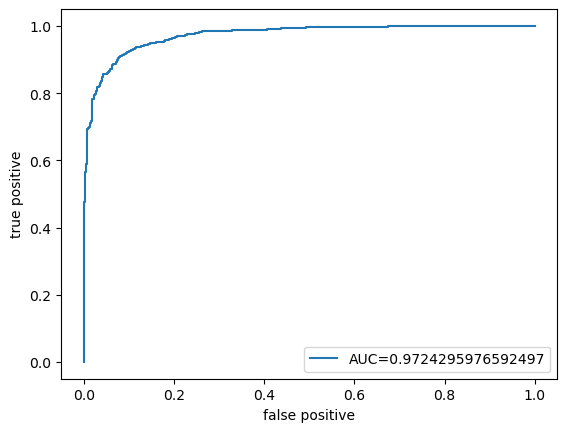

In [36]:
y_pred_prob=l_model.predict_proba(tfidf_df_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test_edit,y_pred_prob)
auc=metrics.roc_auc_score(y_test_edit,y_pred_prob)
plt.plot(fpr,tpr,label='AUC='+str(auc))
plt.ylabel('true positive')
plt.xlabel('false positive')
plt.legend(loc=4)
plt.show()

### 9-Testing

In [54]:
def sim_of_text(url,tweet):
    word = "twitter.com"
    if url == "_":
        return 0
    if word in url:
        return 0
    else:
        a=f.sim_values_url_v1(url,tweet)
        return a

def status_of_link(url):
    try:
        response = requests.get(url,timeout=50)
        if response.status_code == 200:
            return response.url
        else:
            return '_'
    except requests.exceptions.RequestException as e:
        return '_'

In [62]:

def url_to_weight(tweet):
    test_url=[]
    url_weights_list=[]
    url_list=f.find_url(tweet)
    if len(url_list) == 2:
        test_url.append(url_list[0][0])
        test_url.append(url_list[1][0])
        for url in tqdm(test_url):
            text=status_of_link(url)
            url_weights_list.append(sim_of_text(text,tweet))
        return url_weights_list
    elif len(url_list) == 1:
        text=status_of_link(url_list[0][0])
        url_weights_list.append(sim_of_text(text,tweet))
        url_weights_list.append(0)
        return url_weights_list
        
    else:
        return [0.0,0.0]

In [64]:
t='Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville'
url_to_weight(t)

2


100%|██████████| 2/2 [00:52<00:00, 26.27s/it]


[0.2581375589332501, 0]